# Model 002 basicTh

Charlie Shobe

This model has stream power and linear diffusion of the forms:
$$\frac{d\eta}{dt}=-(KA^mS^n-\omega_c)$$
and
$$\frac{d\eta}{dt} = -D\nabla^2\eta$$

So, at steady state, the landscape fall somewhere between:
$$S=\left(\frac{U}{KA^m}\right)^{1/n}$$
and
$$S=\left(\frac{U+\omega_c}{KA^m}\right)^{1/n}$$
because the smoothed threshold rule makes it so that the effective threshold is less than an equivalent hard threshold.
These results are obtained when only the fluvial rule is in place ($D=10e-20$).

Here, I test stream power (m=0.5, n=1) with a threshold $\omega_c=0.001$ m/yr

#### IMPORTANT: IS THERE AN EXACT SLOPE-AREA SOLUTION?? I CAN'T FIND ONE

In [1]:
from erosion_model import BasicTh
import numpy as np
import matplotlib.pyplot as plt
from landlab import imshow_grid

//anaconda/lib/python2.7/site-packages/xarray/core/formatting.py:16: FutureWarning: The pandas.tslib module is deprecated and will be removed in a future version.
  from pandas.tslib import OutOfBoundsDatetime


In [2]:
#parameter dictionary (diffusivity will be 0, K_sp is nonzero)
params = { 'number_of_node_rows' : 100,
          'number_of_node_columns' : 160,
          'node_spacing' : 10.0,
          'east_boundary_closed' : False,
          'north_boundary_closed' : False,
          'west_boundary_closed' : False,
          'south_boundary_closed' : False,
          'dt' : 10.0,
          'K_sp' : 0.001,
          'm_sp' : 0.5,
          'n_sp' : 1.0,
          'linear_diffusivity' : 10e-20,
          'outlet_lowering_rate' : 0.0005,
          'output_filename': 'model_000_output',
          'erosion__threshold' : 0.001
}

In [3]:
#instantiate and establish topo error tolerance
basic = BasicTh(params=params)
tolerance = 0.0001

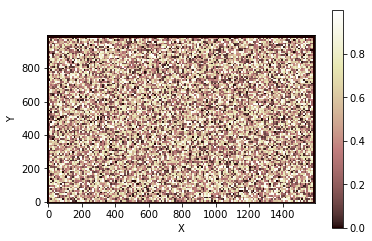

In [4]:
%matplotlib inline
imshow_grid(basic.grid, 'topographic__elevation')

In [5]:
#time loop
dt = 10
elapsed_time = 0 #years
keep_running = True
while keep_running == True:
    pre_topo = basic.grid.at_node['topographic__elevation'][basic.grid.core_nodes]
    basic.run_one_step(dt)
    #    ld.run_one_step(dt = dt)
    #basic.grid.at_node['topographic__elevation'][basic.grid.boundary_nodes] -= uplift_rate * dt
    post_topo = basic.grid.at_node['topographic__elevation'][basic.grid.core_nodes]
    if elapsed_time % 1000 == 0:
        print elapsed_time
        print max(abs(pre_topo - post_topo))
    elapsed_time += dt
    if max(abs(pre_topo - post_topo)) <= tolerance: #1mm
        keep_running = False

0
0.105938308316
1000
0.00881409185096
2000
0.0229889330605
3000
0.0254782997602
4000
0.0272632410161
5000
0.0186542694545
6000
0.0426376839459
7000
0.0299945368092
8000
0.0355533203168
9000
0.0234024350148
10000
0.0305154331387
11000
0.0518507573626
12000
0.0234540445129
13000
0.0459164879457
14000
0.0222100649308
15000
0.0213116510608
16000
0.0163755020643
17000
0.0642778740084
18000
0.0203387740518
19000
0.0195969599875
20000
0.0280375855995
21000
0.0585025322746
22000
0.0243456391024
23000
0.0392372347175
24000
0.0267251166001
25000
0.0201789025928
26000
0.0185309578358
27000
0.020674325806
28000
0.0145768326853
29000
0.0168421671972
30000
0.0147636713419
31000
0.0178121617541
32000
0.0159032250245
33000
0.0145840903739
34000
0.0173116266237
35000
0.0127938730824
36000
0.01489342066
37000
0.0150587055678
38000
0.0596044993082
39000
0.0222760394467
40000
0.0240366938378
41000
0.0146178475066
42000
0.016043122895
43000
0.0149115780211
44000
0.0118923241903
45000
0.0544267122517
46000

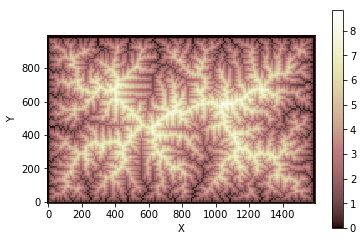

In [6]:
%matplotlib inline
imshow_grid(basic.grid, 'topographic__elevation')

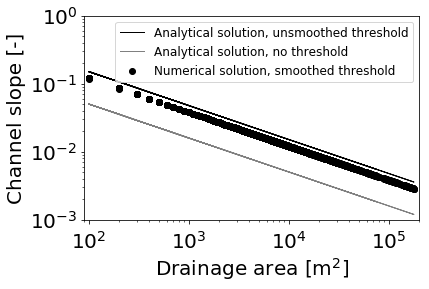

In [19]:
###MAKE SLOPE-AREA PLOT

import matplotlib

#assign area_array and slope_array
area_array = basic.grid.at_node['drainage_area'][(basic.grid.node_x > 10)&(basic.grid.node_x < 1580)&(basic.grid.node_y >10)&(basic.grid.node_y<980)]
slope_array = basic.grid.at_node['topographic__steepest_slope'][(basic.grid.node_x > 10)&(basic.grid.node_x < 1580)&(basic.grid.node_y >10)&(basic.grid.node_y<980)]

##instantiate figure and plot
fig = plt.figure(figsize=(6, 3.75))
slope_area = plt.subplot()

#plotting param
matplotlib.rcParams.update({'font.size': 20})

#create an array for the detachment-limited analytical solution
u = 0.0005 #m/yr, uplift or baselevel lowering rate
k = 0.001 #fluvial erodibility
m = 0.5 #discharge exponent
n = 1.0 #slope exponent
thresh = 0.001 #threshold SP

#calculate analytical slope from area field
analytical_slope_array = np.power((u / k), 1 / n) * np.power(area_array, -m/n)
analytical_slope_array_thresh = np.power(((u + thresh) / k), 1 / n) * np.power(area_array, -m/n)

#plot the analytical solutions
slope_area.plot(area_array, analytical_slope_array_thresh, linestyle='-',
                color='k', linewidth = 1, label = 'Analytical solution, unsmoothed threshold')

slope_area.plot(area_array, analytical_slope_array, linestyle='-',
                color='grey', linewidth = 1, label = 'Analytical solution, no threshold')

#plot the data
slope_area.scatter(area_array, slope_array, marker='o', c='k', 
                   label = 'Numerical solution, smoothed threshold') #plot HA data
                   
#make axes log and set limits
slope_area.set_xscale('log')
slope_area.set_yscale('log')

slope_area.set_xlim(9*10**1, 2*10**5)
slope_area.set_ylim(1e-3, 1e0)

#set x and y labels
slope_area.set_xlabel(r'Drainage area [m$^2$]')
slope_area.set_ylabel('Channel slope [-]')
slope_area.legend(scatterpoints=1,prop={'size':12})
slope_area.tick_params(axis='x', which='major', pad=7)

fig.savefig('threshold_streampower_slope_area.eps',bbox_inches='tight', dpi=1000) #save figure

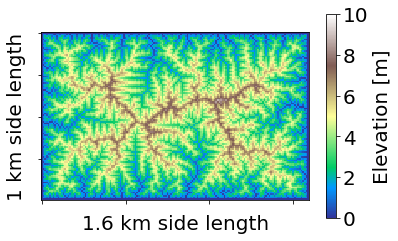

In [14]:
##MAKE TOPO FIGURE
#define 'topo'
topo = basic.grid.at_node['topographic__elevation']
#plotting param
matplotlib.rcParams.update({'font.size': 20})

# #instantiate figure and plot
topo_fig = plt.figure(figsize=(6, 3.75))
t1 = plt.subplot()
topo = topo.reshape(100,160)
ts1_plot = t1.imshow(topo[::-1], cmap='terrain', vmin = 0, vmax = 10)

#add colorbar
cb = plt.colorbar(ts1_plot, label = 'Elevation [m]')

#axis labels
t1.tick_params(labelbottom='off', labelleft='off') 
t1.set_ylabel('1 km side length', labelpad = 15)
t1.set_xlabel('1.6 km side length', labelpad = 15)

#save figure
topo_fig.savefig('threshold_streampower_topo.eps',bbox_inches='tight', dpi=300)

In [1]:
print basic.grid.at_node['topographic__steepest_slope'][235]
#for some reason, the line of nodes adjacent to all the boundaries needs cut
plt.scatter(basic.grid.at_node['drainage_area'][(basic.grid.node_x > 1)&(basic.grid.node_x < 158)&(basic.grid.node_y >1)&(basic.grid.node_y<98)], basic.grid.at_node['topographic__steepest_slope'][(basic.grid.node_x > 1)&(basic.grid.node_x < 158)&(basic.grid.node_y >1)&(basic.grid.node_y<98)])

#slope-area relationship with hard threshold (data should plot below):
plt.plot(basic.grid.at_node['drainage_area'][(basic.grid.node_x > 1)&(basic.grid.node_x < 158)&(basic.grid.node_y >1)&(basic.grid.node_y<98)], ((0.00005+.001) / 0.01)*np.power(basic.grid.at_node['drainage_area'][(basic.grid.node_x > 1)&(basic.grid.node_x < 158)&(basic.grid.node_y >1)&(basic.grid.node_y<98)], -0.5), linestyle='--')

#slope-area relationship with no threshold (data should plot above):
plt.plot(basic.grid.at_node['drainage_area'][(basic.grid.node_x > 1)&(basic.grid.node_x < 158)&(basic.grid.node_y >1)&(basic.grid.node_y<98)], ((0.00005) / 0.01)*np.power(basic.grid.at_node['drainage_area'][(basic.grid.node_x > 1)&(basic.grid.node_x < 158)&(basic.grid.node_y >1)&(basic.grid.node_y<98)], -0.5), linestyle=':')

plt.xscale('log')
plt.yscale('log')
plt.ylim(0.0001, 0.01)

NameError: name 'basic' is not defined